In [1]:
import keras
import mnist_reader
import numpy as np
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [2]:
X_train, y_train = mnist_reader.load_mnist('../data/fashion', kind='train')
X_test, y_test = mnist_reader.load_mnist('../data/fashion', kind='t10k')

# (80%) を訓練用データに、(20%)を検証用データとして使う
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=13)

In [3]:
print(X_train.shape)
print(y_train.shape)
print(X_val.shape)
print(y_val.shape)

(48000, 784)
(48000,)
(12000, 784)
(12000,)


### 画像データの処理
 - (画像枚数,28,28,1)の形に変換する

In [4]:
# Each image's dimension is 28 x 28
img_rows, img_cols = 28, 28
input_shape = (img_rows, img_cols, 1)

# Prepare the training images
X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
X_train = X_train.astype('float32')
X_train /= 255

# Prepare the test images
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
X_test = X_test.astype('float32')
X_test /= 255

# Prepare the validation images
X_val = X_val.reshape(X_val.shape[0], img_rows, img_cols, 1)
X_val = X_val.astype('float32')
X_val /= 255

### ラベルデータの変換
 - 10次元のベクトルにする

In [5]:
num_classes = 10

y_train = keras.utils.to_categorical(y_train,num_classes)
y_val = keras.utils.to_categorical(y_val,num_classes)
y_test = keras.utils.to_categorical(y_test,num_classes)

In [6]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization

cnn4 = Sequential()
cnn4.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
cnn4.add(BatchNormalization())

cnn4.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
cnn4.add(BatchNormalization())
cnn4.add(MaxPooling2D(pool_size=(2, 2)))
cnn4.add(Dropout(0.25))

cnn4.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
cnn4.add(BatchNormalization())
cnn4.add(Dropout(0.25))

cnn4.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
cnn4.add(BatchNormalization())
cnn4.add(MaxPooling2D(pool_size=(2, 2)))
cnn4.add(Dropout(0.25))

cnn4.add(Flatten())

cnn4.add(Dense(512, activation='relu'))
cnn4.add(BatchNormalization())
cnn4.add(Dropout(0.5))

cnn4.add(Dense(128, activation='relu'))
cnn4.add(BatchNormalization())
cnn4.add(Dropout(0.5))

cnn4.add(Dense(10, activation='softmax'))

cnn4.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

In [7]:
cnn4.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
batch_normalization_1 (Batch (None, 26, 26, 32)        128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
batch_normalization_2 (Batch (None, 24, 24, 32)        128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 10, 10, 64)        18496     
__________

In [8]:
history4 = cnn4.fit(X_train, y_train,
          batch_size=256,
          epochs=10,
          verbose=1,
          validation_data=(X_val, y_val))

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 9s 181us/step - loss: 0.7624 - acc: 0.7346 - val_loss: 0.3933 - val_acc: 0.8604
Epoch 2/10
48000/48000 [==============================] - 6s 124us/step - loss: 0.4383 - acc: 0.8427 - val_loss: 0.3390 - val_acc: 0.8813
Epoch 3/10
48000/48000 [==============================] - 6s 124us/step - loss: 0.3662 - acc: 0.8689 - val_loss: 0.3360 - val_acc: 0.8803
Epoch 4/10
48000/48000 [==============================] - 6s 125us/step - loss: 0.3309 - acc: 0.8819 - val_loss: 0.2697 - val_acc: 0.9050
Epoch 5/10
48000/48000 [==============================] - 6s 126us/step - loss: 0.3029 - acc: 0.8911 - val_loss: 0.2731 - val_acc: 0.9038
Epoch 6/10
48000/48000 [==============================] - 6s 125us/step - loss: 0.2817 - acc: 0.8991 - val_loss: 0.2695 - val_acc: 0.9055
Epoch 7/10
48000/48000 [==============================] - 6s 125us/step - loss: 0.2711 - acc: 0.9020 - val_loss: 0.2629 - 

In [9]:
score4 = cnn4.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score4[0])
print('Test accuracy:', score4[1])

Test loss: 0.23880036748051645
Test accuracy: 0.9118


### データ拡張をやってみる

In [10]:
from keras.preprocessing.image import ImageDataGenerator
gen = ImageDataGenerator(rotation_range=8, width_shift_range=0.08, shear_range=0.3,
                               height_shift_range=0.08, zoom_range=0.08)
train_batches = gen.flow(X_train, y_train, batch_size=256)
val_batches = gen.flow(X_val, y_val, batch_size=256)

In [11]:
history4 = cnn4.fit_generator(train_batches, steps_per_epoch=48000//256, epochs=50,
                    validation_data=val_batches, validation_steps=12000//256, use_multiprocessing=True)

Epoch 1/50
187/187 [==============================] - 9s 47ms/step - loss: 0.4005 - acc: 0.8564 - val_loss: 0.3196 - val_acc: 0.8810
Epoch 2/50
187/187 [==============================] - 9s 49ms/step - loss: 0.3559 - acc: 0.8702 - val_loss: 0.3191 - val_acc: 0.8857
Epoch 3/50
187/187 [==============================] - 9s 50ms/step - loss: 0.3402 - acc: 0.8778 - val_loss: 0.3164 - val_acc: 0.8879
Epoch 4/50
187/187 [==============================] - 9s 50ms/step - loss: 0.3288 - acc: 0.8785 - val_loss: 0.3075 - val_acc: 0.8862
Epoch 5/50
187/187 [==============================] - 9s 49ms/step - loss: 0.3159 - acc: 0.8838 - val_loss: 0.2990 - val_acc: 0.8902
Epoch 6/50
187/187 [==============================] - 9s 49ms/step - loss: 0.3119 - acc: 0.8860 - val_loss: 0.2865 - val_acc: 0.8952
Epoch 7/50
187/187 [==============================] - 9s 49ms/step - loss: 0.3051 - acc: 0.8909 - val_loss: 0.2651 - val_acc: 0.9035
Epoch 8/50
187/187 [==============================] - 9s 47ms/step - 

In [12]:
score4 = cnn4.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score4[0])
print('Test accuracy:', score4[1])

Test loss: 0.18289670552909373
Test accuracy: 0.9341


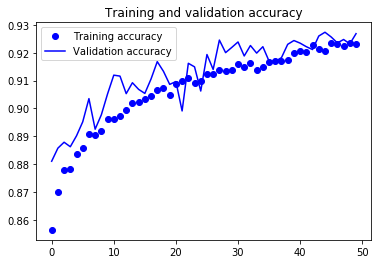

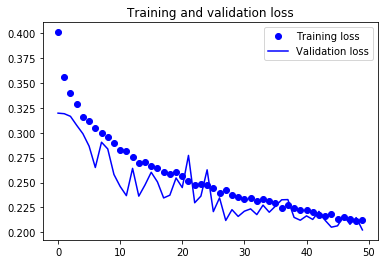

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

accuracy = history4.history['acc']
val_accuracy = history4.history['val_acc']
loss = history4.history['loss']
val_loss = history4.history['val_loss']
epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

### 分類された結果をもう少し詳しく見てみる
 - clasffication repotを使う

In [17]:
# 予測したラベルを取り出す
predicted_classes = cnn4.predict_classes(X_test)

_, y_true = mnist_reader.load_mnist('../data/fashion', kind='t10k')
correct = np.nonzero(predicted_classes==y_true)[0]
incorrect = np.nonzero(predicted_classes!=y_true)[0]

In [18]:
from sklearn.metrics import classification_report
target_names = ["Class {}".format(i) for i in range(10)]
print(classification_report(y_true, predicted_classes, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.91      0.86      0.88      1000
     Class 1       1.00      0.99      0.99      1000
     Class 2       0.93      0.90      0.91      1000
     Class 3       0.93      0.94      0.93      1000
     Class 4       0.91      0.90      0.91      1000
     Class 5       0.98      0.98      0.98      1000
     Class 6       0.77      0.84      0.80      1000
     Class 7       0.95      0.99      0.97      1000
     Class 8       0.99      0.99      0.99      1000
     Class 9       0.99      0.95      0.97      1000

   micro avg       0.93      0.93      0.93     10000
   macro avg       0.94      0.93      0.93     10000
weighted avg       0.94      0.93      0.93     10000



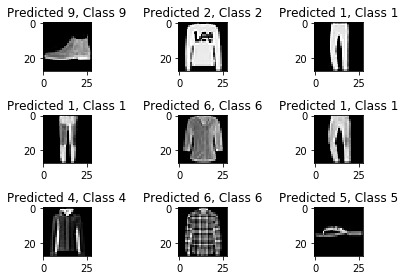

In [19]:
for i, correct in enumerate(correct[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], y_true[correct]))
    plt.tight_layout()

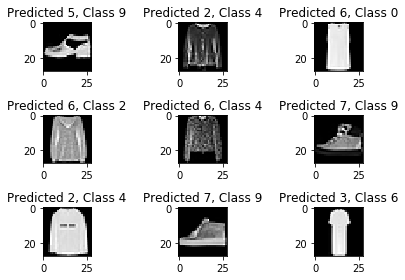

In [20]:
for i, incorrect in enumerate(incorrect[0:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], y_true[incorrect]))
    plt.tight_layout()